In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
data=pd.read_csv('advertising_ef.csv')

In [11]:
data


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0
...,...,...,...,...,...,...,...,...,...,...
1004,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,11-02-2016 21:49,1
1005,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,22-04-2016 02:07,1
1006,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,01-02-2016 17:24,1
1007,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,24-03-2016 02:35,0


tasks-

Q1- Are there any missing values in the dataset related to ad data or customer engagement metrics? How should these missing values be handled?

In [12]:
print(data.isnull().sum())

# Handling missing values
# Option 1: Drop rows or columns with missing values
# data = data.dropna()  # Drop rows with any missing values
# data = data.dropna(axis=1)  # Drop columns with any missing values

# Option 2: Impute missing values
# For numerical columns, you can use fillna() with mean or median
# data['column_name'] = data['column_name'].fillna(data['column_name'].mean())
# data['column_name'] = data['column_name'].fillna(data['column_name'].median())
# For categorical columns, you can use fillna() with mode
# data['column_name'] = data['column_name'].fillna(data['column_name'].mode().iloc[0])

# Option 3: Create a missing value indicator
# data['column_name_missing'] = data['column_name'].isnull().astype(int)

# Option 4: Advanced techniques (e.g., multiple imputation, machine learning-based methods)

# Verify if missing values have been handled
print(data.isnull().sum())


Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64
Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64


Handle missing values:
The appropriate method for handling missing values depends on the nature of the data and the specific context. Here are a few common strategies:

a. Drop rows or columns: If the missing values are relatively few and randomly distributed, you may choose to remove the rows or columns with missing values. However, be cautious as this may result in loss of valuable data.

b. Impute missing values: If dropping rows or columns is not feasible, you can impute the missing values with appropriate replacements. For numerical data, you can use techniques like mean, median, or regression imputation. For categorical data, you can use mode imputation.

c. Create a missing value indicator: Instead of imputing the missing values, you can add a new binary column indicating whether a value is missing or not. This allows the missingness to be considered as a separate feature during analysis.

d. Advanced techniques: If the dataset is large and missing values are substantial, you can explore more advanced techniques like multiple imputation or machine learning-based imputation methods.

Q2- Are there any duplicate entries in the dataset that need to be identified and removed?

In [13]:
print("Number of duplicate entries:", data.duplicated().sum())

# Remove duplicate entries
data = data.drop_duplicates()

# Verify if duplicates have been removed
print("Number of duplicate entries after removal:", data.duplicated().sum())

Number of duplicate entries: 0
Number of duplicate entries after removal: 0


Q3- What is the distribution of different demographic variables in the dataset (e.g., age, gender, country)?

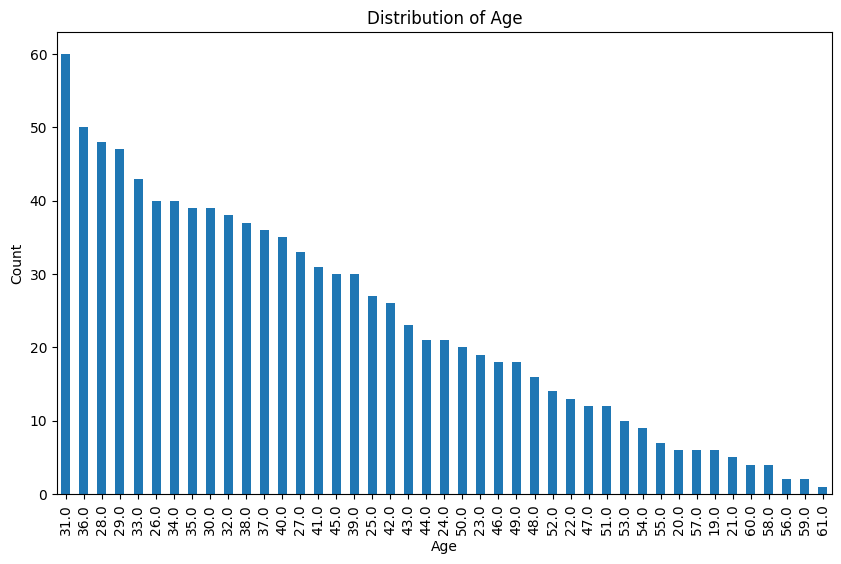

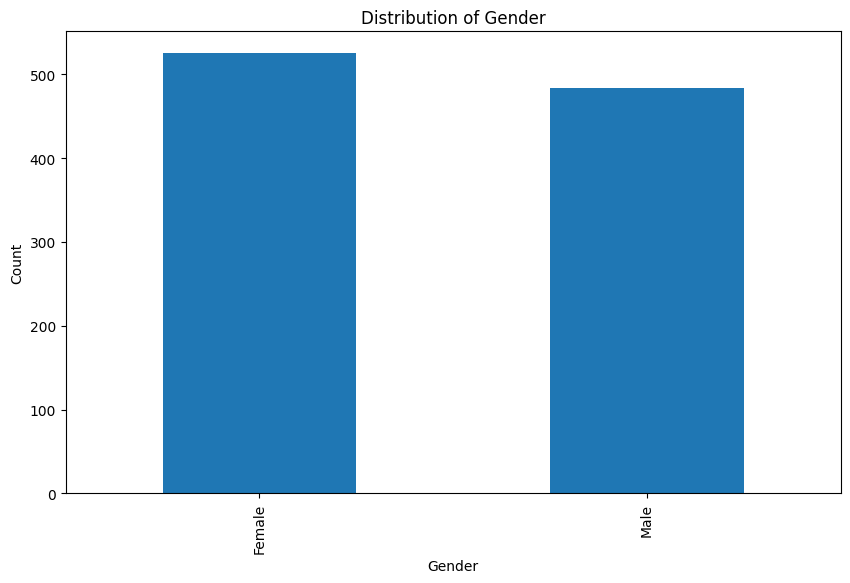

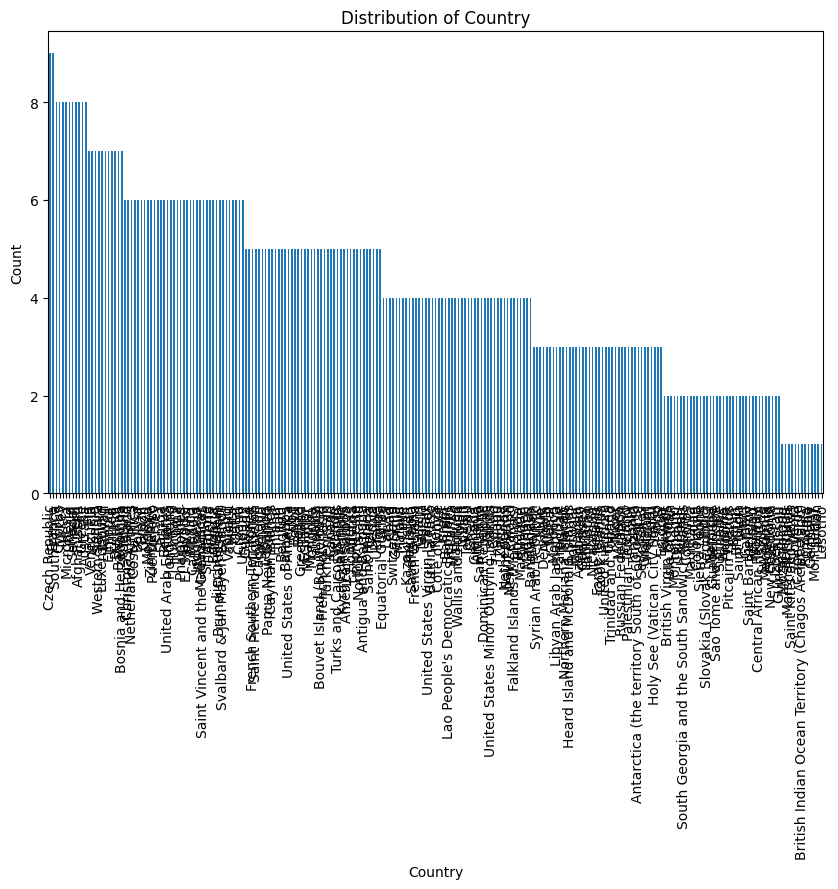

In [14]:
# Demographic variables to analyze
demographic_vars = ['Age', 'Gender', 'Country']

# Plotting the distribution of demographic variables
for var in demographic_vars:
    plt.figure(figsize=(10, 6))
    data[var].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

Q4- How are the numerical variables (e.g., "Daily Time Spent on Site," "Age," "Area Income") distributed? Are there any outliers?

       Daily Time Spent on Site         Age   Area Income
count               1005.000000  998.000000    998.000000
mean                  65.009463   35.962926  54958.573617
std                   15.879997    8.772142  13381.286752
min                   32.600000   19.000000  13996.500000
25%                   51.300000   29.000000  46993.367500
50%                   68.370000   35.000000  56998.245000
75%                   78.570000   42.000000  65267.402500
max                   91.430000   61.000000  79484.800000


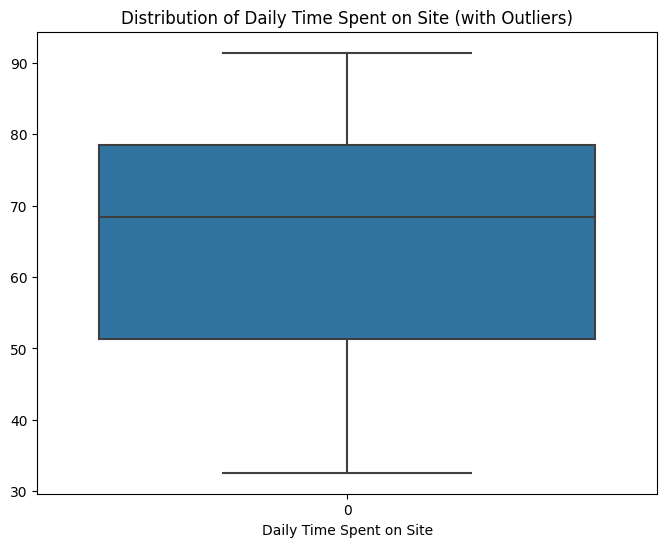

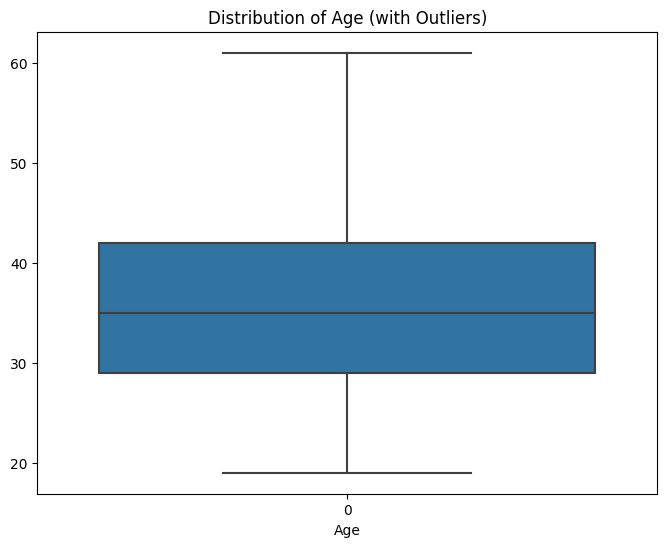

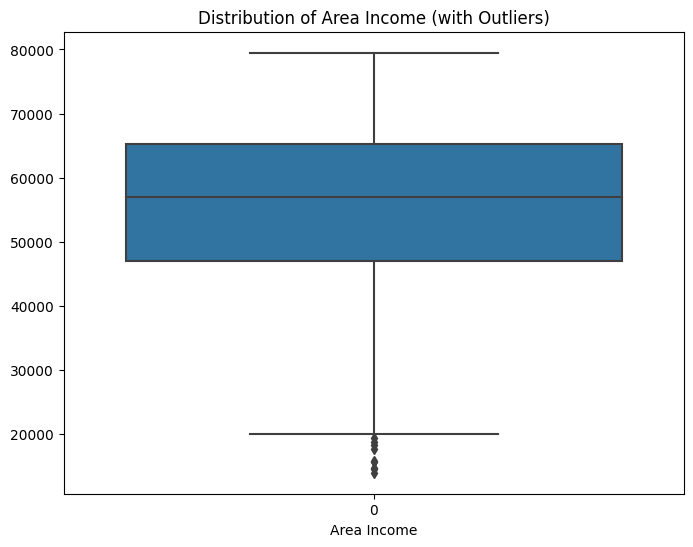

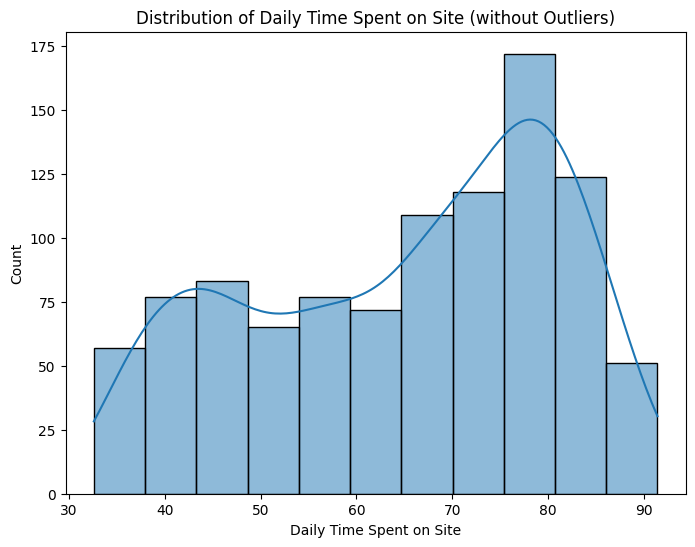

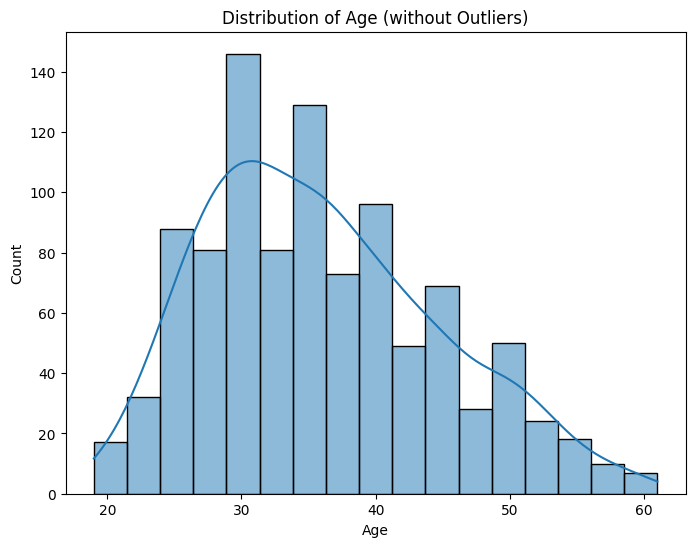

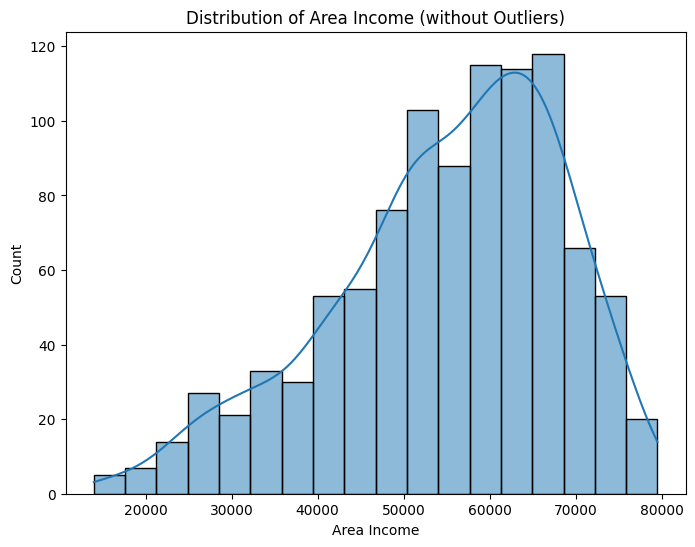

In [15]:
numerical_vars = ['Daily Time Spent on Site', 'Age', 'Area Income']

# Descriptive statistics
print(data[numerical_vars].describe())

# Box plots to visualize distribution and outliers
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[var])
    plt.title(f'Distribution of {var} (with Outliers)')
    plt.xlabel(var)
    plt.show()

# Histograms to visualize distribution without outliers
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var} (without Outliers)')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

Q5-How does the average time spent on the website vary for different demographic groups?

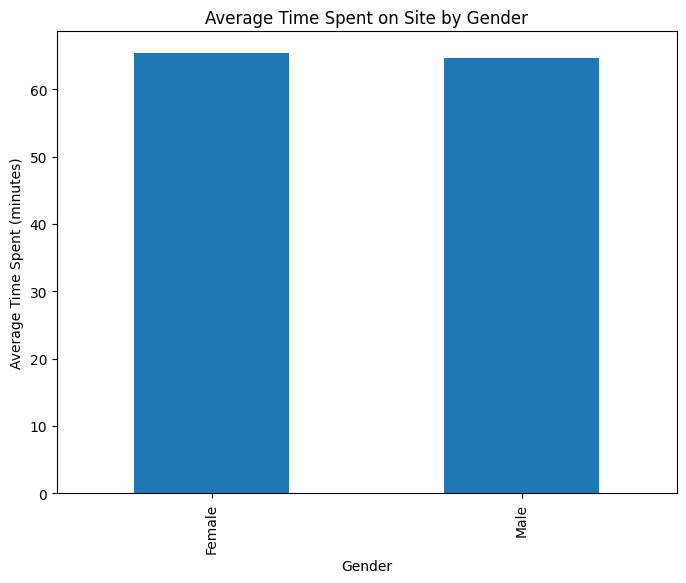

In [16]:
# Calculate average time spent on the website for different demographic groups
average_time_by_demographic = data.groupby('Gender')['Daily Time Spent on Site'].mean()

# Create a bar plot to visualize the average time spent by demographic groups
plt.figure(figsize=(8, 6))
average_time_by_demographic.plot(kind='bar')
plt.title('Average Time Spent on Site by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Time Spent (minutes)')
plt.show()